### Question



   - model = Sequential()
     : 층을 쌓아야 하는데, Sequential(순차적)이라는 틀을 만들고 하나씩 추가해주는 것. 거푸집 같은 역할

   - model.compile(loss='binary_crossentropy',
           optimizer='adam',
           metrics=['accuracy'])

     : 손실함수, 최적화알고리즘 함수를 어떤 것으로 쓸지를 정하는 것. metrics=[accuracy] 정확도표기 (케라스에서만 쓰는 것) 
  -  numpy.random.seed(seed)
  -  tf.compat.v1.set_random_seed(3)
     :  층을 쌓을 수록 가중치 파라미터, bias 파라미터 랜덤으로 생성해주는데, 예제는 다시 실행했을 때 같은 순서로 같은 값이 나오게 하기 위해서 seed 값을 저장했다
     : random 어떤 조건으로 숫자를 발생시켜주는 것 / seed가 고정되어있으면 항상 나오는 순서가 동일하다.
       seed값을 바꾸는 방법 : 시작할 때 마다 밀리 세컨드마다 바꾸어서 전체적으로 바꾸어야한다.


  -  예시
     y = f(x,y,z)
     x = 1
     p = 2
     z = 3 
     특정 입력값에서 특정 출력값이 나오는 것이 함수 
     랜덤도 함수
  - 동일한 인풋 --> 동일한 아웃풋
     바운더리(범위) /속성/ 순서를 등의 변칙이 있는데, 순서 order를 결정하는 변수가 seed.
     seed에 보통 time을 이용하여 사용한다.


In [1]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [85]:
import random

In [86]:
random.seed(4) #random의 seed 값을 고정한다. 이러한 경우 횟수마다 나타나느 값이 같다. # 이 구문이 없을 경우 값이 다르게 나온다 

In [87]:
for i in range(1,7):
    print(random.randrange(1,7))

2
3
1
6
4
4


seed 가 같으면, 어디서 작동시키던간에 같은 숫자가 나온다.

### 세즈노프스키 교수의 광물과 돌을 구분하기 - 과적합 피하기

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
import pandas as pd
import numpy

In [3]:
# seed 값 설정
numpy.random.seed(3)
tf.compat.v1.set_random_seed(3)

# 랜덤으로 생기는 가중치, bias 값은 결과값에 영향을 미친다. --> 여러번 돌려야 한다.

#데이터 적용
df = pd.read_csv('example/080228-master/deeplearning/dataset/sonar.csv', header=None)

In [4]:
print(df.info()) # 샘플 208개, 마지막 타입은 object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [5]:
print(df.head())

       0       1       2       3       4       5       6       7       8   \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       9   ...      51      52      53      54      55      56      57  \
0  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

       58      59  60  
0  0.0090  0.0032   R  
1  0.0052  0.0044   R  
2  0.0095  0.0078   

In [6]:
df.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
           dtype='int64')

In [7]:
dataset = df.values
X = dataset[:,0:60].astype(float)
Y_obj = dataset[:,60]

# 문자열 변환
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

In [8]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [9]:
# 다중 출력이 아니라, 두개의 출력을 나타내는 것이기 떄문에 tf.keras.utils.to_categorical(Y)  이를 사용할 필요는 없다.

In [10]:
# 모델 설정
model = Sequential()
model.add(Dense(24,  input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['accuracy'])


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                1464      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                250       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 1,725
Trainable params: 1,725
Non-trainable params: 0
_________________________________________________________________


In [12]:
# 1층 모델 : 가중치 파라미터 60*24 = 1440개/ 바이오스 파라미터 24 개, 합 = 1464개
# 2층 모델 : 가중치 파라미터 24*10 = 240개/ 바이오스 파라미터 10 개, 합 =  250개
# 3층 모델 : 가중치 파라미터 10*1 = 10개 / 바이오스 파라미터 1개, 합 = 11개
# 3개의 모델 총 1464 + 250 + 11 = 1725개

In [13]:

# 모델 실행
model.fit(X, Y, epochs=200, batch_size=5)
# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

Epoch 1/200
42/42 [==============================] - 0s 5ms/step - loss: 0.2432 - accuracy: 0.5865
Epoch 2/200
42/42 [==============================] - 0s 5ms/step - loss: 0.2288 - accuracy: 0.6394
Epoch 3/200
42/42 [==============================] - 0s 4ms/step - loss: 0.2187 - accuracy: 0.6490
Epoch 4/200
42/42 [==============================] - 0s 5ms/step - loss: 0.2031 - accuracy: 0.7260
Epoch 5/200
42/42 [==============================] - 0s 5ms/step - loss: 0.1893 - accuracy: 0.7692
Epoch 6/200
42/42 [==============================] - 0s 4ms/step - loss: 0.1802 - accuracy: 0.7596
Epoch 7/200
42/42 [==============================] - 0s 4ms/step - loss: 0.1677 - accuracy: 0.7740
Epoch 8/200
42/42 [==============================] - 0s 6ms/step - loss: 0.1590 - accuracy: 0.7837
Epoch 9/200
42/42 [==============================] - 0s 5ms/step - loss: 0.1558 - accuracy: 0.7885
Epoch 10/200
42/42 [==============================] - 0s 4ms/step - loss: 0.1483 - accuracy: 0.7788
Epoch 11/

42/42 [==============================] - 0s 3ms/step - loss: 0.0099 - accuracy: 0.9952
Epoch 164/200
42/42 [==============================] - 0s 4ms/step - loss: 0.0088 - accuracy: 0.9952
Epoch 165/200
42/42 [==============================] - 0s 4ms/step - loss: 0.0073 - accuracy: 0.9952
Epoch 166/200
42/42 [==============================] - 0s 4ms/step - loss: 0.0074 - accuracy: 0.9952
Epoch 167/200
42/42 [==============================] - 0s 4ms/step - loss: 0.0070 - accuracy: 0.9952
Epoch 168/200
42/42 [==============================] - 0s 3ms/step - loss: 0.0078 - accuracy: 0.9952
Epoch 169/200
42/42 [==============================] - 0s 3ms/step - loss: 0.0068 - accuracy: 0.9952
Epoch 170/200
42/42 [==============================] - 0s 3ms/step - loss: 0.0064 - accuracy: 0.9952
Epoch 171/200
42/42 [==============================] - 0s 4ms/step - loss: 0.0064 - accuracy: 0.9952
Epoch 172/200
42/42 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 0.9952
Epoc

In [ ]:
# 100%가 나왔다 --> 과적합(overfit)이 일어났다 --> 딥러닝을 진행시에 데이터가 추가될 수록 loss가 줄어들어야 하는데, 그렇지 않고 새로운 데이터에 적용될 때 lose가 증가하는 경우
--> layer(층)가 너무 많거나, 변수가 복잡해서 발생하거나 테스트셋과 학습셋이 중복될 때 생기기도 한다.
--> 학습하는 데이터셋과 이를 테스트를 할 데이터셋을 완전히 구분하고, 학습과 동시에 테스트를 병행해야 한다.
--> 일반적으로 데이터는 학습 : 테스트 = 7:3 비율로 설정.
--> 모델 저장 ; layer, 노드, 가중치 파라미터, bias 파라미터, hyper 파라미터 정보를 저장.
--> hyper 파라미터 ; optimizer='adam', 등 직접적으로 세팅해주는 여러 변수들
# 학습이 부족한 경우는 underfit(부족학 학습)이라고 한다
# 우리가 실험 시, 약간의 오차가 일어나더라도, 신규 데이터에도 적용될 수 있는 머신 러닝 모듈을 원하고,



### 과적합 피하기 
  - 테스트와 학습 셋을 나누기 3:7

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split # 테스트 set, 학습 set 비율 나누기
from tensorflow.keras.models import load_model # 모델 저장하기

import tensorflow as tf
import pandas as pd
import numpy

#seed (고정 값 제거하기)
#데이터 적용
df = pd.read_csv('example/080228-master/deeplearning/dataset/sonar.csv', header=None)

dataset = df.values
X = dataset[:,0:60].astype(float)
Y_obj = dataset[:,60]

# 문자열 변환
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

# 학습 셋과 테스트 셋의 구분
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

model = Sequential()
model.add(Dense(24,  input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=130, batch_size=5)
model.save('my_model.h5')#모델을 컴퓨터에 저장



del model # 현재 model이라는 object를 제거하여, 이후 불러오는 모델이 적용이 되는가 확인하기.
model = load_model('my_model.h5') #모델을 세로 불러움
# 테스트셋에 모델 적용
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))


Epoch 1/130
29/29 [==============================] - 0s 4ms/step - loss: 0.2528 - accuracy: 0.4414
Epoch 2/130
29/29 [==============================] - 0s 4ms/step - loss: 0.2420 - accuracy: 0.6828
Epoch 3/130
29/29 [==============================] - 0s 3ms/step - loss: 0.2311 - accuracy: 0.7172
Epoch 4/130
29/29 [==============================] - 0s 5ms/step - loss: 0.2221 - accuracy: 0.7655
Epoch 5/130
29/29 [==============================] - 0s 4ms/step - loss: 0.2129 - accuracy: 0.7448
Epoch 6/130
29/29 [==============================] - 0s 3ms/step - loss: 0.2055 - accuracy: 0.7103
Epoch 7/130
29/29 [==============================] - 0s 3ms/step - loss: 0.1879 - accuracy: 0.7379
Epoch 8/130
29/29 [==============================] - 0s 2ms/step - loss: 0.1828 - accuracy: 0.7379
Epoch 9/130
29/29 [==============================] - 0s 3ms/step - loss: 0.1770 - accuracy: 0.7655
Epoch 10/130
29/29 [==============================] - 0s 3ms/step - loss: 0.1684 - accuracy: 0.7793
Epoch 11/

29/29 [==============================] - 0s 3ms/step - loss: 0.0430 - accuracy: 0.9655
Epoch 84/130
29/29 [==============================] - 0s 3ms/step - loss: 0.0370 - accuracy: 0.9793
Epoch 85/130
29/29 [==============================] - 0s 3ms/step - loss: 0.0347 - accuracy: 0.9724
Epoch 86/130
29/29 [==============================] - 0s 3ms/step - loss: 0.0348 - accuracy: 0.9793
Epoch 87/130
29/29 [==============================] - 0s 2ms/step - loss: 0.0330 - accuracy: 0.9862
Epoch 88/130
29/29 [==============================] - 0s 3ms/step - loss: 0.0313 - accuracy: 0.9862
Epoch 89/130
29/29 [==============================] - 0s 3ms/step - loss: 0.0320 - accuracy: 0.9862
Epoch 90/130
29/29 [==============================] - 0s 2ms/step - loss: 0.0298 - accuracy: 0.9862
Epoch 91/130
29/29 [==============================] - 0s 2ms/step - loss: 0.0280 - accuracy: 0.9862
Epoch 92/130
29/29 [==============================] - 0s 2ms/step - loss: 0.0292 - accuracy: 0.9931
Epoch 93/130


### k겹 교차 검증
  - 테스트 할 데이터 값이 충분하지 않을 때 
  - 데이터셋을 여러 개로 나누어 하나씩 테스트셋으로 사용하고 나머지를 모두 합해서 학습셋으로 사용하는 방법
  - sklearn의 StratifiedKFold() 함수를 사용

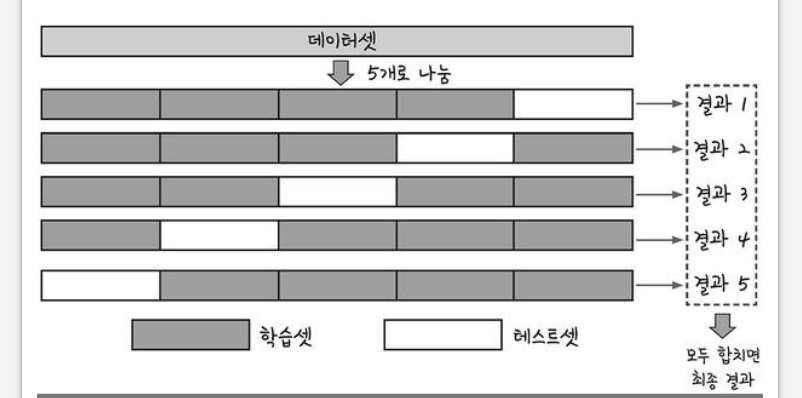

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

import tensorflow as tf
import pandas as pd
import numpy

In [16]:
df = pd.read_csv('example/080228-master/deeplearning/dataset/sonar.csv', header=None)

dataset = df.values
X = dataset[:, 0:60].astype(float)
Y_obj = dataset[:, 60]

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

In [17]:
#10개의 파일로 쪼갬
n_fold = 10
skf = StratifiedKFold(n_splits=n_fold, shuffle=True) #10개를 쪼개서 섞음

In [18]:
# 빈 accuracy 배열
accuracy = []


# 모델의 설정, 컴파일, 실행
for train, test in skf.split(X, Y):
    model = Sequential()
    model.add(Dense(24, input_dim=60, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='mean_squared_error',
                  optimizer='adam',
                  metrics=['accuracy'])
    model.fit(X[train], Y[train], epochs=100, batch_size=5)
    k_accuracy = "%.4f" % (model.evaluate(X[test], Y[test])[1])
    accuracy.append(k_accuracy)

# 결과 출력
print("\n %.f fold accuracy:" % n_fold, accuracy)


Epoch 1/100
38/38 [==============================] - 0s 4ms/step - loss: 0.2579 - accuracy: 0.5348
Epoch 2/100
38/38 [==============================] - 0s 4ms/step - loss: 0.2467 - accuracy: 0.5348
Epoch 3/100
38/38 [==============================] - 0s 5ms/step - loss: 0.2408 - accuracy: 0.5348
Epoch 4/100
38/38 [==============================] - 0s 4ms/step - loss: 0.2328 - accuracy: 0.5936
Epoch 5/100
38/38 [==============================] - 0s 5ms/step - loss: 0.2256 - accuracy: 0.6578
Epoch 6/100
38/38 [==============================] - ETA: 0s - loss: 0.2207 - accuracy: 0.68 - 0s 5ms/step - loss: 0.2199 - accuracy: 0.6845
Epoch 7/100
38/38 [==============================] - 0s 5ms/step - loss: 0.2137 - accuracy: 0.6845: 0s - loss: 0.2127 - accuracy: 
Epoch 8/100
38/38 [==============================] - 0s 4ms/step - loss: 0.2066 - accuracy: 0.6898
Epoch 9/100
38/38 [==============================] - 0s 5ms/step - loss: 0.1984 - accuracy: 0.6952
Epoch 10/100
38/38 [===============

38/38 [==============================] - 0s 3ms/step - loss: 0.0706 - accuracy: 0.9144
Epoch 63/100
38/38 [==============================] - 0s 4ms/step - loss: 0.0673 - accuracy: 0.9144
Epoch 64/100
38/38 [==============================] - 0s 3ms/step - loss: 0.0714 - accuracy: 0.8984
Epoch 65/100
38/38 [==============================] - 0s 4ms/step - loss: 0.0672 - accuracy: 0.9144
Epoch 66/100
38/38 [==============================] - 0s 3ms/step - loss: 0.0620 - accuracy: 0.9358
Epoch 67/100
38/38 [==============================] - 0s 3ms/step - loss: 0.0655 - accuracy: 0.9305
Epoch 68/100
38/38 [==============================] - 0s 3ms/step - loss: 0.0624 - accuracy: 0.9358
Epoch 69/100
38/38 [==============================] - 0s 3ms/step - loss: 0.0590 - accuracy: 0.9412
Epoch 70/100
38/38 [==============================] - 0s 4ms/step - loss: 0.0561 - accuracy: 0.9412
Epoch 71/100
38/38 [==============================] - 0s 3ms/step - loss: 0.0582 - accuracy: 0.9465
Epoch 72/100


38/38 [==============================] - 0s 4ms/step - loss: 0.1232 - accuracy: 0.8610
Epoch 16/100
38/38 [==============================] - 0s 3ms/step - loss: 0.1189 - accuracy: 0.8556
Epoch 17/100
38/38 [==============================] - 0s 3ms/step - loss: 0.1150 - accuracy: 0.8770
Epoch 18/100
38/38 [==============================] - 0s 3ms/step - loss: 0.1148 - accuracy: 0.8717
Epoch 19/100
38/38 [==============================] - 0s 3ms/step - loss: 0.1091 - accuracy: 0.8770
Epoch 20/100
38/38 [==============================] - 0s 4ms/step - loss: 0.1026 - accuracy: 0.8770
Epoch 21/100
38/38 [==============================] - 0s 8ms/step - loss: 0.1034 - accuracy: 0.8770
Epoch 22/100
38/38 [==============================] - 0s 4ms/step - loss: 0.1127 - accuracy: 0.8449
Epoch 23/100
38/38 [==============================] - 0s 3ms/step - loss: 0.0955 - accuracy: 0.9037
Epoch 24/100
38/38 [==============================] - 0s 4ms/step - loss: 0.1070 - accuracy: 0.8824
Epoch 25/100


38/38 [==============================] - 0s 3ms/step - loss: 0.0464 - accuracy: 0.9519
Epoch 70/100
38/38 [==============================] - 0s 3ms/step - loss: 0.0443 - accuracy: 0.9572
Epoch 71/100
38/38 [==============================] - 0s 4ms/step - loss: 0.0430 - accuracy: 0.9679
Epoch 72/100
38/38 [==============================] - 0s 4ms/step - loss: 0.0419 - accuracy: 0.9626
Epoch 73/100
38/38 [==============================] - 0s 4ms/step - loss: 0.0417 - accuracy: 0.9626
Epoch 74/100
38/38 [==============================] - 0s 3ms/step - loss: 0.0402 - accuracy: 0.9626
Epoch 75/100
38/38 [==============================] - 0s 3ms/step - loss: 0.0397 - accuracy: 0.9679
Epoch 76/100
38/38 [==============================] - 0s 3ms/step - loss: 0.0437 - accuracy: 0.9626
Epoch 77/100
38/38 [==============================] - 0s 3ms/step - loss: 0.0444 - accuracy: 0.9572
Epoch 78/100
38/38 [==============================] - 0s 3ms/step - loss: 0.0392 - accuracy: 0.9733
Epoch 79/100


38/38 [==============================] - 0s 3ms/step - loss: 0.1516 - accuracy: 0.8075
Epoch 15/100
38/38 [==============================] - 0s 4ms/step - loss: 0.1472 - accuracy: 0.8235
Epoch 16/100
38/38 [==============================] - 0s 4ms/step - loss: 0.1444 - accuracy: 0.8075
Epoch 17/100
38/38 [==============================] - 0s 3ms/step - loss: 0.1424 - accuracy: 0.8128
Epoch 18/100
38/38 [==============================] - 0s 3ms/step - loss: 0.1363 - accuracy: 0.8235
Epoch 19/100
38/38 [==============================] - 0s 3ms/step - loss: 0.1346 - accuracy: 0.8396
Epoch 20/100
38/38 [==============================] - 0s 3ms/step - loss: 0.1296 - accuracy: 0.8342
Epoch 21/100
38/38 [==============================] - 0s 4ms/step - loss: 0.1286 - accuracy: 0.7914
Epoch 22/100
38/38 [==============================] - 0s 4ms/step - loss: 0.1347 - accuracy: 0.8075
Epoch 23/100
38/38 [==============================] - 0s 6ms/step - loss: 0.1203 - accuracy: 0.8556
Epoch 24/100


38/38 [==============================] - 0s 4ms/step - loss: 0.0249 - accuracy: 0.9893
Epoch 97/100
38/38 [==============================] - 0s 4ms/step - loss: 0.0240 - accuracy: 0.9840
Epoch 98/100
38/38 [==============================] - 0s 4ms/step - loss: 0.0244 - accuracy: 0.9840
Epoch 99/100
38/38 [==============================] - 0s 3ms/step - loss: 0.0263 - accuracy: 0.9733
Epoch 100/100
1/1 [==============================] - 0s 996us/step - loss: 0.0841 - accuracy: 0.9524
Epoch 1/100
38/38 [==============================] - 0s 3ms/step - loss: 0.2582 - accuracy: 0.4652
Epoch 2/100
38/38 [==============================] - 0s 4ms/step - loss: 0.2442 - accuracy: 0.5936
Epoch 3/100
38/38 [==============================] - 0s 3ms/step - loss: 0.2376 - accuracy: 0.6150
Epoch 4/100
38/38 [==============================] - 0s 3ms/step - loss: 0.2285 - accuracy: 0.7059
Epoch 5/100
38/38 [==============================] - 0s 3ms/step - loss: 0.2171 - accuracy: 0.7326
Epoch 6/100
38/38

38/38 [==============================] - 0s 4ms/step - loss: 0.0945 - accuracy: 0.8777
Epoch 42/100
38/38 [==============================] - 0s 4ms/step - loss: 0.0917 - accuracy: 0.8830
Epoch 43/100
38/38 [==============================] - 0s 5ms/step - loss: 0.0902 - accuracy: 0.8936
Epoch 44/100
38/38 [==============================] - 0s 3ms/step - loss: 0.0876 - accuracy: 0.8830
Epoch 45/100
38/38 [==============================] - 0s 4ms/step - loss: 0.0856 - accuracy: 0.9043
Epoch 46/100
38/38 [==============================] - 0s 4ms/step - loss: 0.0878 - accuracy: 0.8936
Epoch 47/100
38/38 [==============================] - 0s 4ms/step - loss: 0.0836 - accuracy: 0.8883
Epoch 48/100
38/38 [==============================] - 0s 3ms/step - loss: 0.0919 - accuracy: 0.8936
Epoch 49/100
38/38 [==============================] - 0s 3ms/step - loss: 0.0876 - accuracy: 0.8830
Epoch 50/100
38/38 [==============================] - 0s 4ms/step - loss: 0.0814 - accuracy: 0.9043
Epoch 51/100


38/38 [==============================] - 0s 4ms/step - loss: 0.0077 - accuracy: 1.0000
Epoch 97/100
38/38 [==============================] - 0s 3ms/step - loss: 0.0080 - accuracy: 1.0000
Epoch 98/100
38/38 [==============================] - 0s 4ms/step - loss: 0.0064 - accuracy: 1.0000
Epoch 99/100
38/38 [==============================] - 0s 4ms/step - loss: 0.0058 - accuracy: 1.0000
Epoch 100/100
1/1 [==============================] - 0s 2ms/step - loss: 0.2023 - accuracy: 0.7500

 10 fold accuracy: ['0.8095', '0.8571', '0.9048', '0.7143', '0.8571', '0.8571', '0.9524', '0.7619', '0.7500', '0.7500']


### 베스트 모델 만들기
  - 와인의 종류 예측

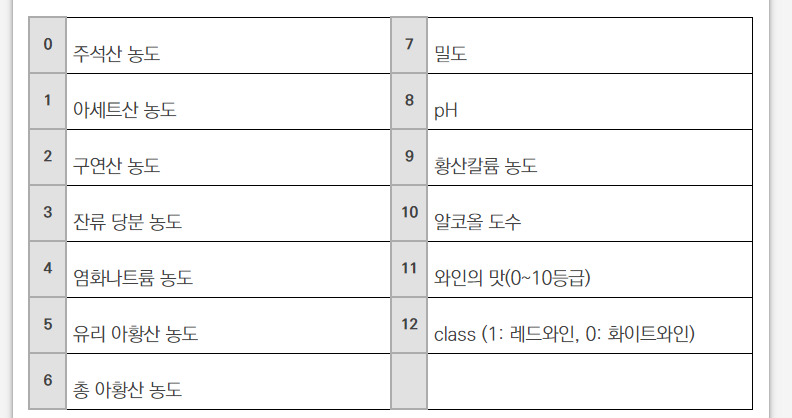

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.callbacks import ModelCheckpoint


import tensorflow as tf
import pandas as pd
import numpy

In [30]:

# 데이터 적용1
df_pre = pd.read_csv('example/080228-master/deeplearning/dataset/wine.csv', header=None)
df = df_pre.sample(frac=1) # tansorflow.sample : 샘플을 섞어 가져오기, frac = 1 : smaple을 전체를 가져온다, 


In [31]:
print(df.head(5))

       0     1     2     3      4     5      6        7     8     9     10  \
5744  6.8  0.26  0.29  11.9  0.052  54.0  160.0  0.99546  3.03  0.58  10.4   
5022  7.1  0.18  0.39  14.5  0.051  48.0  156.0  0.99947  3.35  0.78   9.1   
1379  7.5  0.57  0.02   2.6  0.077  11.0   35.0  0.99557  3.36  0.62  10.8   
313   8.6  0.47  0.30   3.0  0.076  30.0  135.0  0.99760  3.30  0.53   9.4   
646   7.3  0.67  0.05   3.6  0.107   6.0   20.0  0.99720  3.40  0.63  10.1   

      11  12  
5744   6   0  
5022   5   0  
1379   6   1  
313    5   1  
646    5   1  


In [32]:
dataset = df.values
X = dataset[:,0:12].astype(float)
Y = dataset[:,12]



In [33]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 5744 to 5659
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None


In [38]:

# 모델 설정
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#모델 컴파일
model.compile(loss='binary_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])

import os
# 모델 저장 폴더 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
   os.mkdir(MODEL_DIR)

# 모델 저장 조건 설정
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True) #filepath = 모델의 저장 이름을 정해놓은 것 # verbose = 1이면 값을 보여주겠다, 0이면 보여주지 않는다, # save_best_only=True : 모델이 앞서 저장한 모델보다 나아졌을 때만 저장하게끔 하기 위함.

In [35]:
# 1층 모델 : 가중치 파라미터 12*30 = 360개/ 바이오스 파라미터 30 개, 합 = 390개
# 2층 모델 : 가중치 파라미터 30*12 = 360개/ 바이오스 파라미터 12 개, 합 = 372개
# 3층 모델 : 가중치 파라미터 12*8 = 96개 / 바이오스 파라미터 8개, 합 = 104개
# 4층 모델 : 가중치 파라미터 8*1 = 8개 / 바이오스 파라미터 1개, 합 = 9개

# 4개의 모델 총 390 + 372 + 104 + 9 = 875개

In [39]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 30)                390       
_________________________________________________________________
dense_49 (Dense)             (None, 12)                372       
_________________________________________________________________
dense_50 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 9         
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [40]:

# 모델 실행
model.fit(X, Y, validation_split=0.2, epochs=200, batch_size=200, verbose=0, callbacks=[checkpointer]) # checkpointer을 보기 위해 verbose = 0, #callbacks 해줄 때, ModelCheckpoint 함수에 의해 저장이 된다. 

# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))


Epoch 00001: val_loss improved from inf to 0.29318, saving model to ./model\01-0.2932.hdf5

Epoch 00002: val_loss improved from 0.29318 to 0.23743, saving model to ./model\02-0.2374.hdf5

Epoch 00003: val_loss improved from 0.23743 to 0.21581, saving model to ./model\03-0.2158.hdf5

Epoch 00004: val_loss improved from 0.21581 to 0.20553, saving model to ./model\04-0.2055.hdf5

Epoch 00005: val_loss improved from 0.20553 to 0.19845, saving model to ./model\05-0.1984.hdf5

Epoch 00006: val_loss improved from 0.19845 to 0.19248, saving model to ./model\06-0.1925.hdf5

Epoch 00007: val_loss improved from 0.19248 to 0.18801, saving model to ./model\07-0.1880.hdf5

Epoch 00008: val_loss improved from 0.18801 to 0.18392, saving model to ./model\08-0.1839.hdf5

Epoch 00009: val_loss improved from 0.18392 to 0.17947, saving model to ./model\09-0.1795.hdf5

Epoch 00010: val_loss did not improve from 0.17947

Epoch 00011: val_loss improved from 0.17947 to 0.17526, saving model to ./model\11-0.17


Epoch 00099: val_loss did not improve from 0.06755

Epoch 00100: val_loss did not improve from 0.06755

Epoch 00101: val_loss did not improve from 0.06755

Epoch 00102: val_loss did not improve from 0.06755

Epoch 00103: val_loss improved from 0.06755 to 0.06564, saving model to ./model\103-0.0656.hdf5

Epoch 00104: val_loss did not improve from 0.06564

Epoch 00105: val_loss did not improve from 0.06564

Epoch 00106: val_loss did not improve from 0.06564

Epoch 00107: val_loss did not improve from 0.06564

Epoch 00108: val_loss improved from 0.06564 to 0.06427, saving model to ./model\108-0.0643.hdf5

Epoch 00109: val_loss did not improve from 0.06427

Epoch 00110: val_loss did not improve from 0.06427

Epoch 00111: val_loss did not improve from 0.06427

Epoch 00112: val_loss did not improve from 0.06427

Epoch 00113: val_loss did not improve from 0.06427

Epoch 00114: val_loss did not improve from 0.06427

Epoch 00115: val_loss did not improve from 0.06427

Epoch 00116: val_loss did

### 그래프로 확인하기

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import tensorflow as tf
import pandas as pd
import numpy
import os
import matplotlib.pyplot as plt

In [44]:
# 데이터 적용1
df_pre = pd.read_csv('example/080228-master/deeplearning/dataset/wine.csv', header=None)
df = df_pre.sample(frac=0.15)
dataset = df.values
X = dataset[:,0:12].astype(float)
Y = dataset[:,12]


In [45]:

# 모델의 설정
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [46]:
model.compile(loss='binary_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])

In [47]:
# 모델 저장 폴더 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
   os.mkdir(MODEL_DIR)

# 모델 저장 조건 설정
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100) # 손실값이 좋아지지 않으면, 100번까지 기다렸다가 멈추어라.

In [48]:
# 모델 실행 및 저장
history = model.fit(X, Y, validation_split=0.33, epochs=2000, batch_size=500, callbacks=[early_stopping_callback, checkpointer])# 0.33만큼 빼고(테스트), 3500번 돌릴 것

# 이전에는 과적합을 피하기 위해서 학습 : 테스트 = 7 :3 과 같이  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3) 구문을 사용했으나,
# 이제는 model.fit에 validation_split=0.33 구문을 넣어 동일한 효과를 보았다.




Epoch 1/2000
1/2 [==============>...............] - ETA: 0s - loss: 1.1199 - accuracy: 0.3720
Epoch 00001: val_loss improved from inf to 0.47823, saving model to ./model\01-0.4782.hdf5
2/2 [==============================] - 0s 131ms/step - loss: 0.9899 - accuracy: 0.4334 - val_loss: 0.4782 - val_accuracy: 0.7422
Epoch 2/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.4272 - accuracy: 0.7660
Epoch 00002: val_loss did not improve from 0.47823
2/2 [==============================] - 0s 21ms/step - loss: 0.4381 - accuracy: 0.7611 - val_loss: 0.5427 - val_accuracy: 0.7453
Epoch 3/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.4365 - accuracy: 0.7720
Epoch 00003: val_loss did not improve from 0.47823
2/2 [==============================] - 0s 23ms/step - loss: 0.4677 - accuracy: 0.7657 - val_loss: 0.6154 - val_accuracy: 0.7453
Epoch 4/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5090 - accuracy: 0.7660
Epoch 00004: val_loss did not improve from 0.4

Epoch 55/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1481 - accuracy: 0.9460
Epoch 00055: val_loss improved from 0.22410 to 0.22050, saving model to ./model\55-0.2205.hdf5
2/2 [==============================] - 0s 43ms/step - loss: 0.1539 - accuracy: 0.9464 - val_loss: 0.2205 - val_accuracy: 0.9130
Epoch 56/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1492 - accuracy: 0.9460
Epoch 00056: val_loss improved from 0.22050 to 0.21903, saving model to ./model\56-0.2190.hdf5
2/2 [==============================] - 0s 42ms/step - loss: 0.1541 - accuracy: 0.9449 - val_loss: 0.2190 - val_accuracy: 0.9161
Epoch 57/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1687 - accuracy: 0.9420
Epoch 00057: val_loss improved from 0.21903 to 0.21861, saving model to ./model\57-0.2186.hdf5
2/2 [==============================] - 0s 36ms/step - loss: 0.1546 - accuracy: 0.9464 - val_loss: 0.2186 - val_accuracy: 0.9130
Epoch 58/2000
1/2 [==============>............

Epoch 111/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1093 - accuracy: 0.9540
Epoch 00111: val_loss did not improve from 0.20010
2/2 [==============================] - 0s 18ms/step - loss: 0.1347 - accuracy: 0.9495 - val_loss: 0.2013 - val_accuracy: 0.9255
Epoch 112/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1085 - accuracy: 0.9640
Epoch 00112: val_loss improved from 0.20010 to 0.19829, saving model to ./model\112-0.1983.hdf5
2/2 [==============================] - 0s 42ms/step - loss: 0.1338 - accuracy: 0.9495 - val_loss: 0.1983 - val_accuracy: 0.9224
Epoch 113/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1425 - accuracy: 0.9480
Epoch 00113: val_loss improved from 0.19829 to 0.19774, saving model to ./model\113-0.1977.hdf5
2/2 [==============================] - 0s 43ms/step - loss: 0.1347 - accuracy: 0.9525 - val_loss: 0.1977 - val_accuracy: 0.9193
Epoch 114/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1233 - accura

Epoch 139/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1177 - accuracy: 0.9580
Epoch 00139: val_loss improved from 0.18831 to 0.18795, saving model to ./model\139-0.1879.hdf5
2/2 [==============================] - 0s 31ms/step - loss: 0.1267 - accuracy: 0.9556 - val_loss: 0.1879 - val_accuracy: 0.9286
Epoch 140/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1100 - accuracy: 0.9640
Epoch 00140: val_loss improved from 0.18795 to 0.18464, saving model to ./model\140-0.1846.hdf5
2/2 [==============================] - 0s 33ms/step - loss: 0.1260 - accuracy: 0.9556 - val_loss: 0.1846 - val_accuracy: 0.9224
Epoch 141/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1216 - accuracy: 0.9560
Epoch 00141: val_loss improved from 0.18464 to 0.18359, saving model to ./model\141-0.1836.hdf5
2/2 [==============================] - 0s 32ms/step - loss: 0.1256 - accuracy: 0.9571 - val_loss: 0.1836 - val_accuracy: 0.9224
Epoch 142/2000
1/2 [==============>.....

Epoch 167/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1213 - accuracy: 0.9540
Epoch 00167: val_loss improved from 0.17532 to 0.17350, saving model to ./model\167-0.1735.hdf5
2/2 [==============================] - 0s 47ms/step - loss: 0.1192 - accuracy: 0.9571 - val_loss: 0.1735 - val_accuracy: 0.9286
Epoch 168/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1129 - accuracy: 0.9600
Epoch 00168: val_loss improved from 0.17350 to 0.17310, saving model to ./model\168-0.1731.hdf5
2/2 [==============================] - 0s 34ms/step - loss: 0.1187 - accuracy: 0.9602 - val_loss: 0.1731 - val_accuracy: 0.9286
Epoch 169/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1298 - accuracy: 0.9620
Epoch 00169: val_loss improved from 0.17310 to 0.17179, saving model to ./model\169-0.1718.hdf5
2/2 [==============================] - 0s 42ms/step - loss: 0.1191 - accuracy: 0.9617 - val_loss: 0.1718 - val_accuracy: 0.9255
Epoch 170/2000
1/2 [==============>.....

2/2 [==============================] - 0s 56ms/step - loss: 0.1124 - accuracy: 0.9602 - val_loss: 0.1592 - val_accuracy: 0.9348
Epoch 195/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1210 - accuracy: 0.9580
Epoch 00195: val_loss improved from 0.15922 to 0.15819, saving model to ./model\195-0.1582.hdf5
2/2 [==============================] - 0s 47ms/step - loss: 0.1119 - accuracy: 0.9617 - val_loss: 0.1582 - val_accuracy: 0.9317
Epoch 196/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1069 - accuracy: 0.9640
Epoch 00196: val_loss improved from 0.15819 to 0.15806, saving model to ./model\196-0.1581.hdf5
2/2 [==============================] - 0s 38ms/step - loss: 0.1125 - accuracy: 0.9617 - val_loss: 0.1581 - val_accuracy: 0.9348
Epoch 197/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1052 - accuracy: 0.9620
Epoch 00197: val_loss did not improve from 0.15806
2/2 [==============================] - 0s 15ms/step - loss: 0.1118 - accuracy: 0.9617

Epoch 222/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1105 - accuracy: 0.9660
Epoch 00222: val_loss improved from 0.14512 to 0.14340, saving model to ./model\222-0.1434.hdf5
2/2 [==============================] - 0s 40ms/step - loss: 0.1055 - accuracy: 0.9678 - val_loss: 0.1434 - val_accuracy: 0.9317
Epoch 223/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0965 - accuracy: 0.9660
Epoch 00223: val_loss did not improve from 0.14340
2/2 [==============================] - 0s 13ms/step - loss: 0.1049 - accuracy: 0.9602 - val_loss: 0.1456 - val_accuracy: 0.9317
Epoch 224/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1103 - accuracy: 0.9600
Epoch 00224: val_loss improved from 0.14340 to 0.14172, saving model to ./model\224-0.1417.hdf5
2/2 [==============================] - 0s 45ms/step - loss: 0.1070 - accuracy: 0.9587 - val_loss: 0.1417 - val_accuracy: 0.9317
Epoch 225/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0913 - accura

2/2 [==============================] - 0s 38ms/step - loss: 0.0893 - accuracy: 0.9663 - val_loss: 0.1182 - val_accuracy: 0.9503
Epoch 279/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.1003 - accuracy: 0.9620
Epoch 00279: val_loss did not improve from 0.11815
2/2 [==============================] - 0s 18ms/step - loss: 0.0881 - accuracy: 0.9678 - val_loss: 0.1190 - val_accuracy: 0.9472
Epoch 280/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0930 - accuracy: 0.9680
Epoch 00280: val_loss did not improve from 0.11815
2/2 [==============================] - 0s 14ms/step - loss: 0.0888 - accuracy: 0.9678 - val_loss: 0.1195 - val_accuracy: 0.9441
Epoch 281/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0820 - accuracy: 0.9700
Epoch 00281: val_loss did not improve from 0.11815
2/2 [==============================] - 0s 18ms/step - loss: 0.0881 - accuracy: 0.9678 - val_loss: 0.1204 - val_accuracy: 0.9472
Epoch 282/2000
1/2 [==============>............

Epoch 307/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0806 - accuracy: 0.9660
Epoch 00307: val_loss did not improve from 0.11141
2/2 [==============================] - 0s 26ms/step - loss: 0.0866 - accuracy: 0.9663 - val_loss: 0.1266 - val_accuracy: 0.9441
Epoch 308/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0883 - accuracy: 0.9760
Epoch 00308: val_loss did not improve from 0.11141
2/2 [==============================] - 0s 21ms/step - loss: 0.0893 - accuracy: 0.9709 - val_loss: 0.1173 - val_accuracy: 0.9503
Epoch 309/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0909 - accuracy: 0.9700
Epoch 00309: val_loss did not improve from 0.11141
2/2 [==============================] - 0s 24ms/step - loss: 0.0832 - accuracy: 0.9678 - val_loss: 0.1310 - val_accuracy: 0.9472
Epoch 310/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0690 - accuracy: 0.9700
Epoch 00310: val_loss did not improve from 0.11141
2/2 [=======================

Epoch 365/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0707 - accuracy: 0.9740
Epoch 00365: val_loss improved from 0.10451 to 0.10418, saving model to ./model\365-0.1042.hdf5
2/2 [==============================] - 0s 38ms/step - loss: 0.0740 - accuracy: 0.9755 - val_loss: 0.1042 - val_accuracy: 0.9596
Epoch 366/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0684 - accuracy: 0.9780
Epoch 00366: val_loss improved from 0.10418 to 0.10341, saving model to ./model\366-0.1034.hdf5
2/2 [==============================] - 0s 35ms/step - loss: 0.0743 - accuracy: 0.9770 - val_loss: 0.1034 - val_accuracy: 0.9596
Epoch 367/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0655 - accuracy: 0.9800
Epoch 00367: val_loss improved from 0.10341 to 0.10000, saving model to ./model\367-0.1000.hdf5
2/2 [==============================] - 0s 34ms/step - loss: 0.0747 - accuracy: 0.9770 - val_loss: 0.1000 - val_accuracy: 0.9658
Epoch 368/2000
1/2 [==============>.....

Epoch 424/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0741 - accuracy: 0.9720
Epoch 00424: val_loss did not improve from 0.09698
2/2 [==============================] - 0s 22ms/step - loss: 0.0658 - accuracy: 0.9770 - val_loss: 0.1008 - val_accuracy: 0.9627
Epoch 425/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0716 - accuracy: 0.9740
Epoch 00425: val_loss did not improve from 0.09698
2/2 [==============================] - 0s 19ms/step - loss: 0.0654 - accuracy: 0.9755 - val_loss: 0.0996 - val_accuracy: 0.9689
Epoch 426/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0601 - accuracy: 0.9800
Epoch 00426: val_loss did not improve from 0.09698
2/2 [==============================] - 0s 29ms/step - loss: 0.0660 - accuracy: 0.9801 - val_loss: 0.0995 - val_accuracy: 0.9689
Epoch 427/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0651 - accuracy: 0.9840
Epoch 00427: val_loss did not improve from 0.09698
2/2 [=======================

Epoch 454/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0732 - accuracy: 0.9800
Epoch 00454: val_loss improved from 0.09698 to 0.09543, saving model to ./model\454-0.0954.hdf5
2/2 [==============================] - 0s 43ms/step - loss: 0.0654 - accuracy: 0.9816 - val_loss: 0.0954 - val_accuracy: 0.9720
Epoch 455/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0731 - accuracy: 0.9760
Epoch 00455: val_loss improved from 0.09543 to 0.09468, saving model to ./model\455-0.0947.hdf5
2/2 [==============================] - 0s 39ms/step - loss: 0.0644 - accuracy: 0.9816 - val_loss: 0.0947 - val_accuracy: 0.9689
Epoch 456/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0621 - accuracy: 0.9840
Epoch 00456: val_loss did not improve from 0.09468
2/2 [==============================] - 0s 19ms/step - loss: 0.0624 - accuracy: 0.9832 - val_loss: 0.0955 - val_accuracy: 0.9720
Epoch 457/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0586 - accura

Epoch 483/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0555 - accuracy: 0.9820
Epoch 00483: val_loss did not improve from 0.09262
2/2 [==============================] - 0s 17ms/step - loss: 0.0597 - accuracy: 0.9816 - val_loss: 0.0969 - val_accuracy: 0.9689
Epoch 484/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0654 - accuracy: 0.9800
Epoch 00484: val_loss did not improve from 0.09262
2/2 [==============================] - 0s 18ms/step - loss: 0.0600 - accuracy: 0.9816 - val_loss: 0.0976 - val_accuracy: 0.9689
Epoch 485/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0687 - accuracy: 0.9760
Epoch 00485: val_loss did not improve from 0.09262
2/2 [==============================] - 0s 18ms/step - loss: 0.0591 - accuracy: 0.9816 - val_loss: 0.1010 - val_accuracy: 0.9720
Epoch 486/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0671 - accuracy: 0.9800
Epoch 00486: val_loss did not improve from 0.09262
2/2 [=======================

Epoch 513/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0779 - accuracy: 0.9760
Epoch 00513: val_loss did not improve from 0.09103
2/2 [==============================] - 0s 15ms/step - loss: 0.0662 - accuracy: 0.9801 - val_loss: 0.0958 - val_accuracy: 0.9689
Epoch 514/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0484 - accuracy: 0.9860
Epoch 00514: val_loss did not improve from 0.09103
2/2 [==============================] - 0s 15ms/step - loss: 0.0585 - accuracy: 0.9832 - val_loss: 0.1087 - val_accuracy: 0.9596
Epoch 515/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0643 - accuracy: 0.9820
Epoch 00515: val_loss did not improve from 0.09103
2/2 [==============================] - 0s 17ms/step - loss: 0.0679 - accuracy: 0.9832 - val_loss: 0.0926 - val_accuracy: 0.9689
Epoch 516/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0544 - accuracy: 0.9860
Epoch 00516: val_loss did not improve from 0.09103
2/2 [=======================

Epoch 543/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0382 - accuracy: 0.9860
Epoch 00543: val_loss did not improve from 0.08830
2/2 [==============================] - 0s 16ms/step - loss: 0.0580 - accuracy: 0.9847 - val_loss: 0.0922 - val_accuracy: 0.9720
Epoch 544/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0478 - accuracy: 0.9840
Epoch 00544: val_loss did not improve from 0.08830
2/2 [==============================] - 0s 19ms/step - loss: 0.0547 - accuracy: 0.9862 - val_loss: 0.0917 - val_accuracy: 0.9689
Epoch 545/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0518 - accuracy: 0.9840
Epoch 00545: val_loss did not improve from 0.08830
2/2 [==============================] - 0s 17ms/step - loss: 0.0554 - accuracy: 0.9847 - val_loss: 0.0904 - val_accuracy: 0.9689
Epoch 546/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0470 - accuracy: 0.9880
Epoch 00546: val_loss did not improve from 0.08830
2/2 [=======================

Epoch 573/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0444 - accuracy: 0.9880
Epoch 00573: val_loss did not improve from 0.08830
2/2 [==============================] - 0s 16ms/step - loss: 0.0548 - accuracy: 0.9847 - val_loss: 0.0916 - val_accuracy: 0.9720
Epoch 574/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0395 - accuracy: 0.9860
Epoch 00574: val_loss did not improve from 0.08830
2/2 [==============================] - 0s 17ms/step - loss: 0.0537 - accuracy: 0.9862 - val_loss: 0.0972 - val_accuracy: 0.9689
Epoch 575/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0554 - accuracy: 0.9820
Epoch 00575: val_loss did not improve from 0.08830
2/2 [==============================] - 0s 14ms/step - loss: 0.0567 - accuracy: 0.9832 - val_loss: 0.0917 - val_accuracy: 0.9720
Epoch 576/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0500 - accuracy: 0.9880
Epoch 00576: val_loss did not improve from 0.08830
2/2 [=======================

Epoch 603/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0553 - accuracy: 0.9860
Epoch 00603: val_loss did not improve from 0.08745
2/2 [==============================] - 0s 18ms/step - loss: 0.0520 - accuracy: 0.9862 - val_loss: 0.0899 - val_accuracy: 0.9752
Epoch 604/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0482 - accuracy: 0.9880
Epoch 00604: val_loss did not improve from 0.08745
2/2 [==============================] - 0s 19ms/step - loss: 0.0527 - accuracy: 0.9877 - val_loss: 0.0909 - val_accuracy: 0.9689
Epoch 605/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0530 - accuracy: 0.9880
Epoch 00605: val_loss did not improve from 0.08745
2/2 [==============================] - 0s 19ms/step - loss: 0.0515 - accuracy: 0.9862 - val_loss: 0.0967 - val_accuracy: 0.9689
Epoch 606/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0504 - accuracy: 0.9820
Epoch 00606: val_loss did not improve from 0.08745
2/2 [=======================

Epoch 633/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0478 - accuracy: 0.9900
Epoch 00633: val_loss did not improve from 0.08655
2/2 [==============================] - 0s 14ms/step - loss: 0.0520 - accuracy: 0.9893 - val_loss: 0.0946 - val_accuracy: 0.9720
Epoch 634/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0455 - accuracy: 0.9920
Epoch 00634: val_loss did not improve from 0.08655
2/2 [==============================] - 0s 21ms/step - loss: 0.0509 - accuracy: 0.9877 - val_loss: 0.0974 - val_accuracy: 0.9689
Epoch 635/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0435 - accuracy: 0.9840
Epoch 00635: val_loss did not improve from 0.08655
2/2 [==============================] - 0s 16ms/step - loss: 0.0503 - accuracy: 0.9847 - val_loss: 0.0984 - val_accuracy: 0.9720
Epoch 636/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0577 - accuracy: 0.9860
Epoch 00636: val_loss did not improve from 0.08655
2/2 [=======================

Epoch 663/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0634 - accuracy: 0.9820
Epoch 00663: val_loss did not improve from 0.08634
2/2 [==============================] - 0s 19ms/step - loss: 0.0516 - accuracy: 0.9862 - val_loss: 0.0974 - val_accuracy: 0.9720
Epoch 664/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0553 - accuracy: 0.9900
Epoch 00664: val_loss did not improve from 0.08634
2/2 [==============================] - 0s 18ms/step - loss: 0.0493 - accuracy: 0.9908 - val_loss: 0.0985 - val_accuracy: 0.9720
Epoch 665/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0527 - accuracy: 0.9900
Epoch 00665: val_loss did not improve from 0.08634
2/2 [==============================] - 0s 25ms/step - loss: 0.0488 - accuracy: 0.9908 - val_loss: 0.1002 - val_accuracy: 0.9689
Epoch 666/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0437 - accuracy: 0.9900
Epoch 00666: val_loss did not improve from 0.08634
2/2 [=======================

Epoch 693/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0493 - accuracy: 0.9880
Epoch 00693: val_loss did not improve from 0.08634
2/2 [==============================] - 0s 18ms/step - loss: 0.0514 - accuracy: 0.9893 - val_loss: 0.0905 - val_accuracy: 0.9689
Epoch 694/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0490 - accuracy: 0.9920
Epoch 00694: val_loss did not improve from 0.08634
2/2 [==============================] - 0s 17ms/step - loss: 0.0501 - accuracy: 0.9877 - val_loss: 0.0871 - val_accuracy: 0.9720
Epoch 695/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0586 - accuracy: 0.9860
Epoch 00695: val_loss did not improve from 0.08634
2/2 [==============================] - 0s 17ms/step - loss: 0.0495 - accuracy: 0.9893 - val_loss: 0.0883 - val_accuracy: 0.9814
Epoch 696/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0402 - accuracy: 0.9900
Epoch 00696: val_loss improved from 0.08634 to 0.08571, saving model to ./model

Epoch 723/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0392 - accuracy: 0.9900
Epoch 00723: val_loss did not improve from 0.08571
2/2 [==============================] - 0s 20ms/step - loss: 0.0469 - accuracy: 0.9877 - val_loss: 0.0934 - val_accuracy: 0.9689
Epoch 724/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0419 - accuracy: 0.9880
Epoch 00724: val_loss did not improve from 0.08571
2/2 [==============================] - 0s 24ms/step - loss: 0.0493 - accuracy: 0.9862 - val_loss: 0.0905 - val_accuracy: 0.9720
Epoch 725/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0525 - accuracy: 0.9880
Epoch 00725: val_loss did not improve from 0.08571
2/2 [==============================] - 0s 27ms/step - loss: 0.0471 - accuracy: 0.9908 - val_loss: 0.0941 - val_accuracy: 0.9814
Epoch 726/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0455 - accuracy: 0.9920
Epoch 00726: val_loss did not improve from 0.08571
2/2 [=======================

Epoch 753/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0558 - accuracy: 0.9880
Epoch 00753: val_loss did not improve from 0.08571
2/2 [==============================] - 0s 20ms/step - loss: 0.0480 - accuracy: 0.9893 - val_loss: 0.1009 - val_accuracy: 0.9658
Epoch 754/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0611 - accuracy: 0.9840
Epoch 00754: val_loss did not improve from 0.08571
2/2 [==============================] - 0s 21ms/step - loss: 0.0535 - accuracy: 0.9832 - val_loss: 0.1017 - val_accuracy: 0.9658
Epoch 755/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0634 - accuracy: 0.9820
Epoch 00755: val_loss did not improve from 0.08571
2/2 [==============================] - 0s 18ms/step - loss: 0.0547 - accuracy: 0.9862 - val_loss: 0.0868 - val_accuracy: 0.9814
Epoch 756/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0508 - accuracy: 0.9880
Epoch 00756: val_loss did not improve from 0.08571
2/2 [=======================

Epoch 783/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0576 - accuracy: 0.9840
Epoch 00783: val_loss did not improve from 0.08505
2/2 [==============================] - 0s 18ms/step - loss: 0.0504 - accuracy: 0.9847 - val_loss: 0.0940 - val_accuracy: 0.9689
Epoch 784/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0543 - accuracy: 0.9880
Epoch 00784: val_loss did not improve from 0.08505
2/2 [==============================] - 0s 20ms/step - loss: 0.0481 - accuracy: 0.9877 - val_loss: 0.0876 - val_accuracy: 0.9814
Epoch 785/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0405 - accuracy: 0.9920
Epoch 00785: val_loss did not improve from 0.08505
2/2 [==============================] - 0s 23ms/step - loss: 0.0457 - accuracy: 0.9923 - val_loss: 0.0851 - val_accuracy: 0.9814
Epoch 786/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0338 - accuracy: 0.9940
Epoch 00786: val_loss improved from 0.08505 to 0.08245, saving model to ./model

1/2 [==============>...............] - ETA: 0s - loss: 0.0203 - accuracy: 0.9980
Epoch 00842: val_loss did not improve from 0.08104
2/2 [==============================] - 0s 15ms/step - loss: 0.0430 - accuracy: 0.9923 - val_loss: 0.0919 - val_accuracy: 0.9845
Epoch 843/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0501 - accuracy: 0.9900
Epoch 00843: val_loss did not improve from 0.08104
2/2 [==============================] - 0s 20ms/step - loss: 0.0468 - accuracy: 0.9908 - val_loss: 0.0896 - val_accuracy: 0.9783
Epoch 844/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0503 - accuracy: 0.9920
Epoch 00844: val_loss did not improve from 0.08104
2/2 [==============================] - 0s 17ms/step - loss: 0.0432 - accuracy: 0.9939 - val_loss: 0.0956 - val_accuracy: 0.9689
Epoch 845/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0424 - accuracy: 0.9880
Epoch 00845: val_loss did not improve from 0.08104
2/2 [==============================] - 0s 2

Epoch 872/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0509 - accuracy: 0.9900
Epoch 00872: val_loss did not improve from 0.08104
2/2 [==============================] - 0s 20ms/step - loss: 0.0454 - accuracy: 0.9893 - val_loss: 0.1020 - val_accuracy: 0.9689
Epoch 873/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0365 - accuracy: 0.9920
Epoch 00873: val_loss did not improve from 0.08104
2/2 [==============================] - 0s 18ms/step - loss: 0.0478 - accuracy: 0.9893 - val_loss: 0.0993 - val_accuracy: 0.9720
Epoch 874/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0342 - accuracy: 0.9940
Epoch 00874: val_loss did not improve from 0.08104
2/2 [==============================] - 0s 22ms/step - loss: 0.0415 - accuracy: 0.9939 - val_loss: 0.1085 - val_accuracy: 0.9720
Epoch 875/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.0594 - accuracy: 0.9840
Epoch 00875: val_loss did not improve from 0.08104
2/2 [=======================

In [49]:
history

In [50]:
history.history #val_loss :(테스트셋으로 실험한결과의 오차값), val_accuracy : (학습셋으로 측정한 정확도 값)이 들어있는 것을 확인하자

{'loss': [0.989876925945282,
  0.4381166994571686,
  0.4676666557788849,
  0.5112243890762329,
  0.5183298587799072,
  0.49564996361732483,
  0.45226073265075684,
  0.40209653973579407,
  0.35193589329719543,
  0.32810625433921814,
  0.334952712059021,
  0.34164246916770935,
  0.3145049810409546,
  0.2849816381931305,
  0.2726966142654419,
  0.26868483424186707,
  0.2651596963405609,
  0.2576981782913208,
  0.24760125577449799,
  0.23925119638442993,
  0.2330113798379898,
  0.22998346388339996,
  0.22651658952236176,
  0.2215442955493927,
  0.2165757715702057,
  0.21313884854316711,
  0.20985674858093262,
  0.2060505747795105,
  0.2021523118019104,
  0.19832095503807068,
  0.19512848556041718,
  0.19224786758422852,
  0.18943502008914948,
  0.18693731725215912,
  0.1840212494134903,
  0.18145263195037842,
  0.1790817230939865,
  0.1765209436416626,
  0.17415574193000793,
  0.1718628704547882,
  0.1700594425201416,
  0.16818055510520935,
  0.16682042181491852,
  0.16551880538463593,
  0

In [53]:
y_vloss = history.history['val_loss']

In [54]:
y_acc=history.history['val_accuracy']

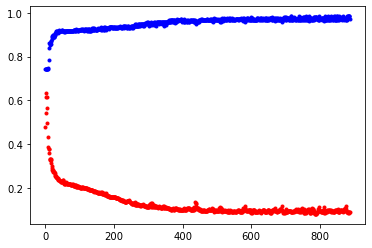

In [55]:
# x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = numpy.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()

In [56]:
#테스트 결과는 어느정도 지나면 과적합이 일어난다.
# EarlyStopping()함수

## 회귀 문제

### 집값 알아보기

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

import numpy
import pandas as pd
import tensorflow as tf


In [58]:
df = pd.read_csv('example/080228-master/deeplearning/dataset/housing.csv', delim_whitespace=True, header=None) #data 분류가 ,가 아니라 whitespace기 때문에, 그것으로 분류한다.

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    int64  
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    int64  
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
 13  13      506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [60]:
print(df.head(5))

        0     1     2   3      4      5     6       7   8      9     10  \
0  0.00632  18.0  2.31   0  0.538  6.575  65.2  4.0900   1  296.0  15.3   
1  0.02731   0.0  7.07   0  0.469  6.421  78.9  4.9671   2  242.0  17.8   
2  0.02729   0.0  7.07   0  0.469  7.185  61.1  4.9671   2  242.0  17.8   
3  0.03237   0.0  2.18   0  0.458  6.998  45.8  6.0622   3  222.0  18.7   
4  0.06905   0.0  2.18   0  0.458  7.147  54.2  6.0622   3  222.0  18.7   

       11    12    13  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


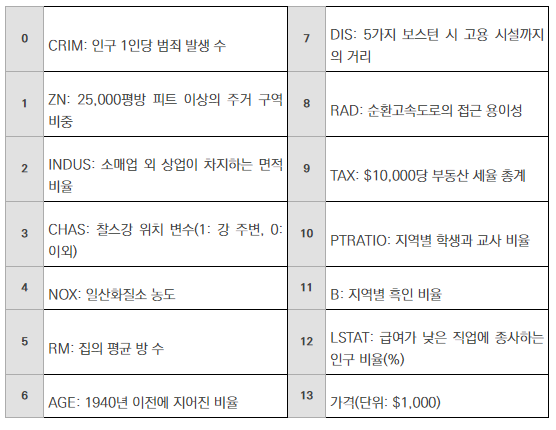

  -  선형 회귀 데이터는 참과 거짓을 구분할 필요가 없어 출력층에 활성화 함수를 지정할 필요가 없다
  -  분류가 아닌 값을 직접 비교하기 때문에, 마지막의 활성화함수가 필요하지 않다.

In [61]:
dataset = df.values
X = dataset[:,0:13].astype(float)
Y = dataset[:,13]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [62]:
model = Sequential()
model.add(Dense(30, input_dim=13, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error',
              optimizer='adam')

In [63]:
# 1층 모델 : 가중치 파라미터 13*30 = 390개/ 바이오스 파라미터 30 개, 합 = 420개
# 2층 모델 : 가중치 파라미터 30*6 = 180개/ 바이오스 파라미터 6 개, 합 =  186개
# 3층 모델 : 가중치 파라미터 6*1 = 6개 / 바이오스 파라미터 1개, 합 = 7개
# 3개의 모델 총 420 + 186 + 7 = 613개
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 30)                420       
_________________________________________________________________
dense_57 (Dense)             (None, 6)                 186       
_________________________________________________________________
dense_58 (Dense)             (None, 1)                 7         
Total params: 613
Trainable params: 613
Non-trainable params: 0
_________________________________________________________________


In [64]:
model.fit(X_train, Y_train, epochs=200, batch_size=100)#배치가 작으면, 특잇값들 때문에 loss에도 영향을 준다.

Epoch 1/200
4/4 [==============================] - 0s 2ms/step - loss: 15077.5957
Epoch 2/200
4/4 [==============================] - 0s 3ms/step - loss: 11726.3672
Epoch 3/200
4/4 [==============================] - 0s 5ms/step - loss: 8898.9189
Epoch 4/200
4/4 [==============================] - 0s 3ms/step - loss: 6684.2354
Epoch 5/200
4/4 [==============================] - 0s 3ms/step - loss: 4954.5854
Epoch 6/200
4/4 [==============================] - 0s 3ms/step - loss: 3593.1023
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 2605.0811
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 1851.1051
Epoch 9/200
4/4 [==============================] - 0s 3ms/step - loss: 1265.8185
Epoch 10/200
4/4 [==============================] - 0s 3ms/step - loss: 827.3121
Epoch 11/200
4/4 [==============================] - 0s 2ms/step - loss: 517.9334
Epoch 12/200
4/4 [==============================] - 0s 4ms/step - loss: 334.4679
Epoch 13/200
4/4 [========

In [65]:
Y_prediction = model.predict(X_test).flatten() # predict : 학습이 다 된 모델에 테스트 값을 넣어 결과를 도출하는 함수 / flatten() : 데이터 배열이 몇차원이던간에, 1차원으로 줄여주는 함수.

In [66]:
Y_prediction

array([27.256178 , 19.810131 , 13.655229 , 25.42116  , 13.645573 ,
       24.788548 , 23.251385 , 19.127535 , 27.632849 , 14.704895 ,
       13.552894 , 22.988932 , 14.729843 , 20.653463 , 17.365917 ,
       18.57893  , 10.711501 , 29.462286 , 19.826971 , 27.222221 ,
       16.671936 , 32.370335 , 19.82445  ,  8.70704  , 25.429167 ,
       32.271816 , 22.153875 , 22.25573  , 24.759542 , 22.739569 ,
       32.944893 , 21.300095 , 24.398632 , 29.197212 , 19.05807  ,
       22.249212 , 30.442572 , 12.208619 , 12.586983 , 11.338567 ,
       20.661514 , 28.363438 , 25.038116 , 23.749857 , 24.152733 ,
       28.506851 , 28.369566 , 23.823137 , 22.73484  , 27.04038  ,
        8.855124 , 22.082651 , 21.852095 , 34.131107 , 19.270636 ,
       21.75644  , 27.482044 , 27.7384   , 28.658567 , 35.99109  ,
       17.089098 , 38.729378 , 25.314766 , 20.282816 , 22.654081 ,
       11.594791 , 25.075575 , 31.693197 , 25.67836  , 13.971081 ,
       19.62271  , 30.445543 , 17.180584 , 13.181005 , 36.2717

In [67]:
for i in range(30):
    label = Y_test[i]
    prediction = Y_prediction[i]
    print("실제가격: {:.3f}, 예상가격: {:.3f}".format(label, prediction))

실제가격: 50.000, 예상가격: 27.256
실제가격: 11.300, 예상가격: 19.810
실제가격: 8.700, 예상가격: 13.655
실제가격: 27.500, 예상가격: 25.421
실제가격: 9.500, 예상가격: 13.646
실제가격: 22.600, 예상가격: 24.789
실제가격: 23.100, 예상가격: 23.251
실제가격: 17.800, 예상가격: 19.128
실제가격: 20.700, 예상가격: 27.633
실제가격: 14.800, 예상가격: 14.705
실제가격: 7.200, 예상가격: 13.553
실제가격: 20.600, 예상가격: 22.989
실제가격: 8.300, 예상가격: 14.730
실제가격: 18.000, 예상가격: 20.653
실제가격: 13.600, 예상가격: 17.366
실제가격: 22.500, 예상가격: 18.579
실제가격: 11.700, 예상가격: 10.712
실제가격: 36.400, 예상가격: 29.462
실제가격: 50.000, 예상가격: 19.827
실제가격: 48.300, 예상가격: 27.222
실제가격: 19.100, 예상가격: 16.672
실제가격: 36.200, 예상가격: 32.370
실제가격: 14.100, 예상가격: 19.824
실제가격: 10.900, 예상가격: 8.707
실제가격: 23.700, 예상가격: 25.429
실제가격: 30.100, 예상가격: 32.272
실제가격: 20.500, 예상가격: 22.154
실제가격: 21.200, 예상가격: 22.256
실제가격: 20.400, 예상가격: 24.760
실제가격: 23.100, 예상가격: 22.740


### 이미지 인식의 꽃, CNN
  - 미국 국립표준기술원(NIST)이 고등학생과 인구조사국 직원 등이 쓴 손글씨를 이용해 만든 데이터를 이용하기

In [94]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils

import numpy
import sys
import tensorflow as tf

In [95]:
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()


In [96]:
print("학습셋 이미지 수 : %d개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d개" % (X_test.shape[0]))

학습셋 이미지 수 : 60000개
테스트셋 이미지 수 : 10000개


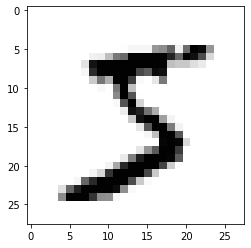

In [97]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [98]:
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [99]:
X_train = X_train.reshape(X_train.shape[0], 784) # 가로 28, 세로 28의 2차원 배열을 784개의 1차원 배열로 바꿔주기

In [100]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [101]:
X_train = X_train.astype('float64')
X_train = X_train / 255 #케라스는 데이터를 0에서 1 사이의 값으로 변환한 다음 구동할 때 최적의 성능을 보여 255로 나눠 0~1사이 값으로 변경

In [102]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [103]:
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

In [104]:
print("class : %d " % (Y_class_train[0]))

class : 5 


In [105]:
Y_train = utils.to_categorical(Y_class_train, 10) #딥러닝의 분류 문제를 해결하기위해 원 - 핫 - 인코딩 방식을 적용해주기,
Y_test = utils.to_categorical(Y_class_test, 10) # 즉 0또는 1로만 이루어진 벡터로 값 수정하기

print(Y_train[0])


[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [106]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



In [107]:
# 1층 모델 : 가중치 파라미터 784*512 = 401,408개/ 바이오스 파라미터 512 개, 합 = 401,920개
# 2층 모델 : 가중치 파라미터 512*10 = 5120개/ 바이오스 파라미터 10 개, 합 = 5,130개

# 2개의 모델 총 401,920 + 5,130 = 407,050개

In [108]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_62 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [109]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
import os
# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [110]:
# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 00001: val_loss improved from inf to 0.14711, saving model to ./model\01-0.1471.hdf5

Epoch 00002: val_loss improved from 0.14711 to 0.10306, saving model to ./model\02-0.1031.hdf5

Epoch 00003: val_loss improved from 0.10306 to 0.08953, saving model to ./model\03-0.0895.hdf5

Epoch 00004: val_loss improved from 0.08953 to 0.07822, saving model to ./model\04-0.0782.hdf5

Epoch 00005: val_loss improved from 0.07822 to 0.07204, saving model to ./model\05-0.0720.hdf5

Epoch 00006: val_loss improved from 0.07204 to 0.06765, saving model to ./model\06-0.0677.hdf5

Epoch 00007: val_loss improved from 0.06765 to 0.06715, saving model to ./model\07-0.0672.hdf5

Epoch 00008: val_loss improved from 0.06715 to 0.06245, saving model to ./model\08-0.0624.hdf5

Epoch 00009: val_loss did not improve from 0.06245

Epoch 00010: val_loss did not improve from 0.06245

Epoch 00011: val_loss did not improve from 0.06245

Epoch 00012: val_loss did not improve from 0.06245

Epoch 00013: val_loss did n

In [111]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))
y_vloss = history.history['val_loss']
  
# 학습셋의 오차
y_loss = history.history['loss']

313/313 [==============================] - 1s 3ms/step - loss: 0.0767 - accuracy: 0.9800

 Test Accuracy: 0.9800


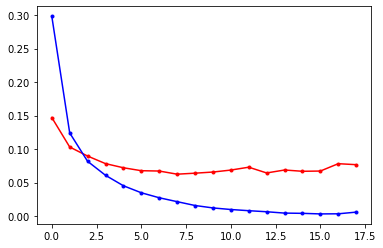

In [112]:
# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

In [113]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

import numpy
import pandas as pd
import tensorflow as tf


In [114]:
df = pd.read_csv('example/080228-master/deeplearning/dataset/housing.csv', delim_whitespace=True, header=None) #data 분류가 ,가 아니라 whitespace기 때문에, 그것으로 분류한다.

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    int64  
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    int64  
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
 13  13      506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [116]:
print(df.head(5))

        0     1     2   3      4      5     6       7   8      9     10  \
0  0.00632  18.0  2.31   0  0.538  6.575  65.2  4.0900   1  296.0  15.3   
1  0.02731   0.0  7.07   0  0.469  6.421  78.9  4.9671   2  242.0  17.8   
2  0.02729   0.0  7.07   0  0.469  7.185  61.1  4.9671   2  242.0  17.8   
3  0.03237   0.0  2.18   0  0.458  6.998  45.8  6.0622   3  222.0  18.7   
4  0.06905   0.0  2.18   0  0.458  7.147  54.2  6.0622   3  222.0  18.7   

       11    12    13  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


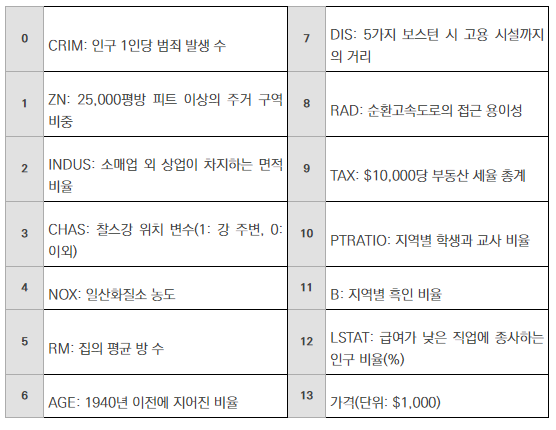

  -  선형 화귀 데이터는 참과 거짓을 구분할 필요가 없어 출력층에 활성화 함수를 지정할 필요가 없다
  -  분류가 아닌 값을 직접 비교하기 때문에, 마지막의 활성화함수가 필요하지 않다.

In [117]:
dataset = df.values
X = dataset[:,0:13].astype(float)
Y = dataset[:,13]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [118]:
model = Sequential()
model.add(Dense(30, input_dim=13, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error',
              optimizer='adam')

In [119]:
# 1층 모델 : 가중치 파라미터 13*30 = 390개/ 바이오스 파라미터 30 개, 합 = 420개
# 2층 모델 : 가중치 파라미터 30*6 = 180개/ 바이오스 파라미터 6 개, 합 =  186개
# 3층 모델 : 가중치 파라미터 6*1 = 6개 / 바이오스 파라미터 1개, 합 = 7개
# 3개의 모델 총 420 + 186 + 7 = 613개
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 30)                420       
_________________________________________________________________
dense_64 (Dense)             (None, 6)                 186       
_________________________________________________________________
dense_65 (Dense)             (None, 1)                 7         
Total params: 613
Trainable params: 613
Non-trainable params: 0
_________________________________________________________________


In [120]:
model.fit(X_train, Y_train, epochs=200, batch_size=100)#배치가 작으면, 특잇값들 때문에 loss에도 영향을 준다.

Epoch 1/200
4/4 [==============================] - 0s 2ms/step - loss: 360.5990
Epoch 2/200
4/4 [==============================] - 0s 3ms/step - loss: 221.1380
Epoch 3/200
4/4 [==============================] - 0s 3ms/step - loss: 149.0070
Epoch 4/200
4/4 [==============================] - 0s 3ms/step - loss: 114.7813
Epoch 5/200
4/4 [==============================] - 0s 3ms/step - loss: 112.8082
Epoch 6/200
4/4 [==============================] - 0s 3ms/step - loss: 105.1701
Epoch 7/200
4/4 [==============================] - 0s 2ms/step - loss: 104.0931
Epoch 8/200
4/4 [==============================] - 0s 2ms/step - loss: 94.9899
Epoch 9/200
4/4 [==============================] - 0s 2ms/step - loss: 87.9598
Epoch 10/200
4/4 [==============================] - 0s 2ms/step - loss: 83.6289
Epoch 11/200
4/4 [==============================] - 0s 3ms/step - loss: 79.9810
Epoch 12/200
4/4 [==============================] - 0s 2ms/step - loss: 78.9886
Epoch 13/200
4/4 [========================

4/4 [==============================] - 0s 2ms/step - loss: 40.9676
Epoch 104/200
4/4 [==============================] - 0s 3ms/step - loss: 39.8126
Epoch 105/200
4/4 [==============================] - 0s 2ms/step - loss: 40.5862
Epoch 106/200
4/4 [==============================] - 0s 2ms/step - loss: 41.5184
Epoch 107/200
4/4 [==============================] - 0s 3ms/step - loss: 40.2374
Epoch 108/200
4/4 [==============================] - 0s 2ms/step - loss: 40.2156
Epoch 109/200
4/4 [==============================] - 0s 2ms/step - loss: 40.0170
Epoch 110/200
4/4 [==============================] - 0s 3ms/step - loss: 39.1070
Epoch 111/200
4/4 [==============================] - 0s 3ms/step - loss: 39.1020
Epoch 112/200
4/4 [==============================] - 0s 3ms/step - loss: 39.4487
Epoch 113/200
4/4 [==============================] - 0s 3ms/step - loss: 39.9012
Epoch 114/200
4/4 [==============================] - 0s 4ms/step - loss: 39.1670
Epoch 115/200
4/4 [=======================

In [121]:
Y_prediction = model.predict(X_test).flatten() # predict : 학습이 다 된 모델에 테스트 값을 넣어 결과를 도출하는 함수 / flatten() : 데이터 배열이 몇차원이던간에, 1차원으로 줄여주는 함수.

In [122]:
Y_prediction

array([ 6.90909  ,  9.092985 , 12.22614  , 28.340199 , 29.183456 ,
       10.640601 , 19.573355 , 21.179733 , 20.165823 ,  9.329421 ,
       18.643288 , 14.051578 , 14.940596 , 11.213565 , 27.697033 ,
       18.28029  , 22.348972 , 10.589797 , 30.20563  , 15.64039  ,
        5.727418 , 19.010628 , 20.275188 , 18.419212 ,  5.582162 ,
       25.186691 , 22.411192 ,  8.84802  , 30.061092 , 25.37513  ,
       22.07014  , 34.452946 , 14.757553 , 31.397049 , 27.136227 ,
       27.368658 , 39.463345 , 25.41061  , 31.1269   , 25.869719 ,
       24.822586 , 17.735445 , 15.49206  , 15.715182 , 18.041958 ,
       28.697273 , 16.216301 , 23.603516 , 20.079853 , 20.81625  ,
       22.267452 , 24.31379  ,  7.3910503, 25.707428 , 15.049638 ,
       30.417114 , 20.869984 , 35.57802  , 25.869968 , 27.279793 ,
       10.632657 , 15.564782 , 17.551502 , 25.353397 , 24.968143 ,
       24.646587 , 29.107887 , 27.215752 , 14.272014 , 23.761015 ,
       12.1351385, 28.957355 , 13.608916 , 18.53997  , 23.5526

In [123]:
for i in range(30):
    label = Y_test[i]
    prediction = Y_prediction[i]
    print("실제가격: {:.3f}, 예상가격: {:.3f}".format(label, prediction))

실제가격: 15.600, 예상가격: 6.909
실제가격: 18.600, 예상가격: 9.093
실제가격: 6.300, 예상가격: 12.226
실제가격: 33.100, 예상가격: 28.340
실제가격: 24.400, 예상가격: 29.183
실제가격: 15.000, 예상가격: 10.641
실제가격: 16.800, 예상가격: 19.573
실제가격: 18.900, 예상가격: 21.180
실제가격: 21.400, 예상가격: 20.166
실제가격: 8.500, 예상가격: 9.329
실제가격: 21.900, 예상가격: 18.643
실제가격: 13.500, 예상가격: 14.052
실제가격: 27.100, 예상가격: 14.941
실제가격: 8.100, 예상가격: 11.214
실제가격: 21.600, 예상가격: 27.697
실제가격: 17.800, 예상가격: 18.280
실제가격: 28.100, 예상가격: 22.349
실제가격: 13.600, 예상가격: 10.590
실제가격: 24.000, 예상가격: 30.206
실제가격: 15.200, 예상가격: 15.640
실제가격: 7.000, 예상가격: 5.727
실제가격: 16.400, 예상가격: 19.011
실제가격: 18.700, 예상가격: 20.275
실제가격: 18.800, 예상가격: 18.419
실제가격: 13.100, 예상가격: 5.582
실제가격: 20.300, 예상가격: 25.187
실제가격: 21.400, 예상가격: 22.411
실제가격: 5.000, 예상가격: 8.848
실제가격: 35.400, 예상가격: 30.061
실제가격: 22.300, 예상가격: 25.375


### 이미지 인식의 꽃, CNN
  - 미국 국립표준기술원(NIST)이 고등학생과 인구조사국 직원 등이 쓴 손글씨를 이용해 만든 데이터를 이용하기

In [60]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils

import numpy
import sys
import tensorflow as tf

In [61]:
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()


In [62]:
print("학습셋 이미지 수 : %d개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d개" % (X_test.shape[0]))

학습셋 이미지 수 : 60000개
테스트셋 이미지 수 : 10000개


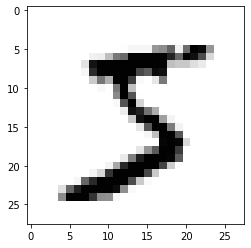

In [63]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [64]:
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [65]:
X_train = X_train.reshape(X_train.shape[0], 784) # 가로 28, 세로 28의 2차원 배열을 784개의 1차원 배열로 바꿔주기

In [66]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [67]:
X_train = X_train.astype('float64')
X_train = X_train / 255 #케라스는 데이터를 0에서 1 사이의 값으로 변환한 다음 구동할 때 최적의 성능을 보여 255로 나눠 0~1사이 값으로 변경

In [68]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [69]:
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

In [70]:
print("class : %d " % (Y_class_train[0]))

class : 5 


In [71]:
Y_train = utils.to_categorical(Y_class_train, 10) #딥러닝의 분류 문제를 해결하기위해 원 - 핫 - 인코딩 방식을 적용해주기,
Y_test = utils.to_categorical(Y_class_test, 10) # 즉 0또는 1로만 이루어진 벡터로 값 수정하기

print(Y_train[0])


[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [72]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



In [73]:
# 1층 모델 : 가중치 파라미터 784*512 = 401,408개/ 바이오스 파라미터 512 개, 합 = 401,920개
# 2층 모델 : 가중치 파라미터 512*10 = 5120개/ 바이오스 파라미터 10 개, 합 = 5,130개

# 2개의 모델 총 401,920 + 5,130 = 407,050개

In [74]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [75]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
import os
# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [76]:
# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 00001: val_loss improved from inf to 0.15098, saving model to ./model\01-0.1510.hdf5

Epoch 00002: val_loss improved from 0.15098 to 0.10518, saving model to ./model\02-0.1052.hdf5

Epoch 00003: val_loss improved from 0.10518 to 0.08240, saving model to ./model\03-0.0824.hdf5

Epoch 00004: val_loss improved from 0.08240 to 0.07580, saving model to ./model\04-0.0758.hdf5

Epoch 00005: val_loss improved from 0.07580 to 0.06441, saving model to ./model\05-0.0644.hdf5

Epoch 00006: val_loss did not improve from 0.06441

Epoch 00007: val_loss improved from 0.06441 to 0.06295, saving model to ./model\07-0.0629.hdf5

Epoch 00008: val_loss improved from 0.06295 to 0.06105, saving model to ./model\08-0.0611.hdf5

Epoch 00009: val_loss did not improve from 0.06105

Epoch 00010: val_loss did not improve from 0.06105

Epoch 00011: val_loss improved from 0.06105 to 0.05691, saving model to ./model\11-0.0569.hdf5

Epoch 00012: val_loss did not improve from 0.05691

Epoch 00013: val_loss did n

In [77]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))
y_vloss = history.history['val_loss']
  
# 학습셋의 오차
y_loss = history.history['loss']

313/313 [==============================] - 1s 2ms/step - loss: 0.0647 - accuracy: 0.9842

 Test Accuracy: 0.9842


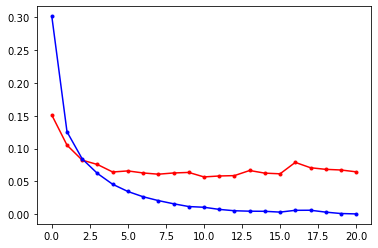

In [78]:
# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

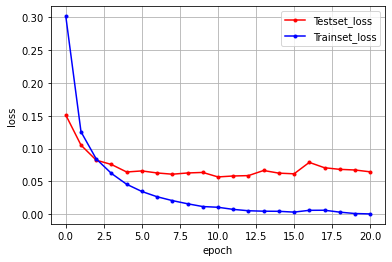

In [83]:

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')
# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


### 딥러닝 프레임

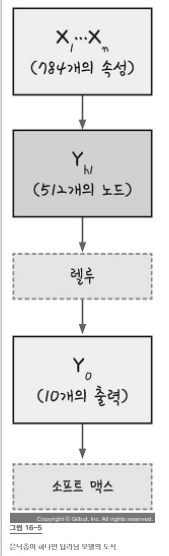

## convolution Neural Network
  - Convolution
      - 공간 영역 기반 처리
      - mask( 또는 커널이라고 함) 내의 원소값을 이용, 원래의 이미지 값을 변경시켜준다.
      - 3 by 3 의 mask를 이미지의 화소값과 곱해주어 나오는 특정값을 더하고, 그 값을 이미지의 가운데 화소 값으로 변경시켜준다.
      - 스트라이드 : 이동할 칸의 개수를 의미. ex) 스트라이드 1 : 1칸씩 이동하겠다.
  - Convolution의 예시
      - Blurring
          - 전체 마스크값이 1/9이며 화소값이 급격하게 변하는 부분을 부드럽게 처리한다.
      - Edge
          - 화소값이 급격히 변하는 부분(Edge)를 처리하는  방법.
          - 수직마스크 (좌측이 모두 -1, 중간이 0, 우측이 1) / 수평마스크
              - 경계를 검출해주는 프로그래밍.
              
  - Filtering > Min / Max
      - 마스크가 겹치지 않고 마스크 크기만큼 띄어 간다. 
      - 마스크는 마스크 크기 만큼의 이미지 화소 중에서 최대값 또는 최소값을 중앙에 두어 원래 이미지의 크기를 변경한다.

  - 여러가지 마스크를 만들어, 적용할 것이다.